# Assignment 2.1 Rank- and Census-Transform
---
Group 3:
* Jiye Lee
* Eduardo Venegas Hernández
---

Import Libraries

In [26]:
import Pkg

using Images
using FileIO
using Plots

In this task, features for the rank and census transform are computed. In the next task, these
descriptors are used to implement a motion detector by matching points across images.

1. Write a Julia function ranktransform(img, kernel; epsilon=0.1) that implements the rank transform. It should take a grayscale input image img and compute the rank value of each pixel by comparing it to the neighboring locations selected by the boolean array kernel. The value epsilon serves as a tolerance threshold, i.e., instead of testing whether the central pixel is larger than its neighbors, the function should test whether the central pixel value is larger by a margin of at least epsilon.

In [42]:
# Write a Julia function ranktransform(img, kernel; epsilon=0.1) that implements
#   the rank transform. It should take a grayscale input image img and compute the
#   rank value of each pixel by comparing it to the neighboring locations selected by the
#   boolean array kernel. The value epsilon serves as a tolerance threshold, i.e., instead
#   of testing whether the central pixel is larger than its neighbors, the function should
#   test whether the central pixel value is larger by a margin of at least epsilon.

# kernel example
# kernel = [true false true false false false true false]

function ranktransform(img, kernel; epsilon=0.1)
    # your code here

    # create a new image with the same size as the input image
    img_new = zeros(size(img))

    # size of kernel always 8

    # loop over all pixels in the image
    for i in 2:size(img,1) -1 
        for j in 2:size(img,2) -1

            # get the value of the central pixel
            central_pixel = img[i,j]

            # get the values of the neighboring pixels

            # get the value of the top left pixel
            top_left_pixel = img[i-1,j-1]

            # get the value of the top pixel
            top_pixel = img[i-1,j]

            # get the value of the top right pixel
            top_right_pixel = img[i-1,j+1]

            # get the value of the left pixel
            left_pixel = img[i,j-1]

            # get the value of the right pixel
            right_pixel = img[i,j+1]

            # get the value of the bottom left pixel
            bottom_left_pixel = img[i+1,j-1]

            # get the value of the bottom pixel
            bottom_pixel = img[i+1,j]

            # get the value of the bottom right pixel
            bottom_right_pixel = img[i+1,j+1]

            # get the values of the neighboring pixels into an array
            neighboring_pixels = [top_left_pixel top_pixel top_right_pixel left_pixel right_pixel bottom_left_pixel bottom_pixel bottom_right_pixel]

            # keep the values of the neighboring pixels where the kernel is true
            neighboring_pixels = neighboring_pixels[kernel]

            # get the number of neighboring pixels that are smaller than the central pixel + epsilon
            number_of_larger_pixels = sum(neighboring_pixels .< (central_pixel - N0f8.(epsilon)))

            # put the rank value into the new image
            img_new[i,j] = number_of_larger_pixels
        end
    end

    # convert array to image
    img_new = Gray.(img_new)
    return img_new
end

ranktransform (generic function with 1 method)

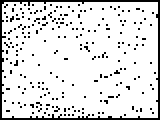

Rank transform with epsilon = 0


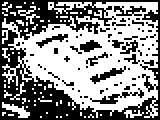

Rank transform with epsilon = 0.01


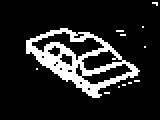

Rank transform with epsilon = 0.1


In [82]:
img = load("images/taxi01.png")
# Convert img to grayscale
img = Gray.(img)

# Create a boolean kernel
kernel = [true true true true true true true true]

# Compute the rank transform of img
img_rank1 = ranktransform(img, kernel; epsilon=0)
img_rank2 = ranktransform(img, kernel; epsilon=0.01)
img_rank3 = ranktransform(img, kernel)


# Display the input image and the rank transform image
display(img_rank1)
println("Rank transform with epsilon = 0")
display(img_rank2)
println("Rank transform with epsilon = 0.01")
display(img_rank3)
println("Rank transform with epsilon = 0.1")

2. Implement a Julia function censustransform(img, kernel; epsilon=0.1) that computes the census transform. It should calculate the census values for every location in a grayscale image img and return them as a 2D matrix of type UInt64. Use a 3-valued scheme for encoding the census values: c=0 for darker image points, c=1 for similar pixels, c=2 for brighter image points (i.e. use a ternary basis to compute the census value). The intensity threshold epsilon for the similarity calculation should be parameterizable, as well as the census kernel. The latter should have the size 5 × 5 by default.

In [74]:
# Implement a Julia function censustransform(img, kernel; epsilon=0.1) that computes
#   the census transform. It should calculate the census values for every location
#   in a grayscale image img and return them as a 2D matrix of type UInt64. Use a
#   3-valued scheme for encoding the census values: c=0 for darker image points, c=1 for
#   similar pixels, c=2 for brighter image points (i.e. use a ternary basis to compute the
#   census value). The intensity threshold epsilon for the similarity calculation should be
#   parameterizable, as well as the census kernel. The latter should have the size 5 × 5 by
#   default.

function censustransform(img, kernel; epsilon=0.7)
    # your code here

    # create a new image with the same size as the input image of type UInt64
    img_new = zeros(UInt64, size(img))
    
    # window is equal to size of kernel divided by 2 and floor
    window = floor(Int, size(kernel,1)/2)

    # loop over all pixels in the image
    for i in 1+window:size(img,1) - window 
        for j in 1+window:size(img,2) - window
          # get the value of the central pixel
          central_pixel = img[i,j]

          bit_string = ""


          # iterate the kernel
          for k in 1:size(kernel,1)
            for l in 1:size(kernel,2)
              # get the value of the neighboring pixel
              if ((i-window+k - 1) == i && (j-window+l  - 1) == j) continue end
              neighboring_pixel = img[i-window+k - 1,j-window+l  - 1]

              # check if the neighboring pixel is darker than the central pixel
              if (neighboring_pixel < central_pixel - N0f8.(epsilon))
                bit_string = bit_string * "10"
              # check if the neighboring pixel is brighter than the central pixel
              elseif (neighboring_pixel > central_pixel + N0f8.(epsilon))
                bit_string = bit_string * "00"
              # check if the neighboring pixel is similar to the central pixel
              else
                bit_string = bit_string * "01"
              end
            end
          end
          # print bit_string
          # convert bit string to UInt64
          img_new[i,j] = parse(UInt64, bit_string, base=2)
        end
    end

    # convert array to image
    return img_new
end

censustransform (generic function with 1 method)

3. Test your implementations on the images provided with the assignment, e.g.: taxi01.png. The results may vary depending on the implementation, kernel and intensity threshold, but the structures of the original image should be recognizable (see example results).

In [79]:
# create a 2 dimensional array of size 5x5 with boolean values
 kernel = [
  true true true true true;
  true true true true true;
  true true true true true;
  true true true true true;
  true true true true true;
  ]
# kernel = [
#   true true true;
#   true true true;
#   true true true;
#   ]

# Compute the census transform of img
img_census1 = censustransform(img, kernel; epsilon=0.01);
img_census2 = censustransform(img, kernel; epsilon=0.1); 
img_census3 = censustransform(img, kernel; epsilon=0.5);

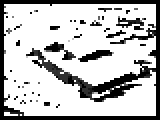

Census transform with epsilon = 0.01

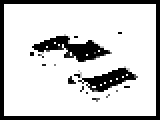


Census transform with epsilon = 0.1


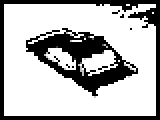

Census transform with epsilon = 0.5


In [83]:
# normalize the census transform image to the range 0..255 and convert it to image
img_census1 = Gray.((img_census1 .- minimum(img_census1)) ./ (maximum(img_census1) - minimum(img_census1)) .* 255)
img_census2 = Gray.((img_census2 .- minimum(img_census2)) ./ (maximum(img_census2) - minimum(img_census2)) .* 255)
img_census3 = Gray.((img_census3 .- minimum(img_census3)) ./ (maximum(img_census3) - minimum(img_census3)) .* 255)

display(img_census1)
println("Census transform with epsilon = 0.01")
display(img_census2)
println("Census transform with epsilon = 0.1")
display(img_census3)
println("Census transform with epsilon = 0.5")